In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 100
np.random.seed(23)

# Let it be the *true* weights vector
w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-3, 3, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Here comes the *true* target vector
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [3]:




def GradDescnet(alpha):
    n_features = 2
    n_objects = 300
    np.random.seed(23)
    
    
    grad_w = lambda w: 2. * np.dot(X.T, (X.dot(w) - Y)) / Y.size
    
    w0= np.array([-2., 2.])
    w = w0.copy()
    w_list = [w.copy()]
    
    
    for it in range(50):
        gradient = grad_w(w)
        w = w - alpha * gradient
        w_list.append(w.copy())
        
        
    w_list = np.array(w_list)
    return  w_list[:, 0], w_list[:, 1]


def draw_GD_MS(alpha):
    
    alpha =alpha
    x_na, y_na = GradDescnet(alpha )

    return  x_na, y_na

<IPython.core.display.Javascript object>


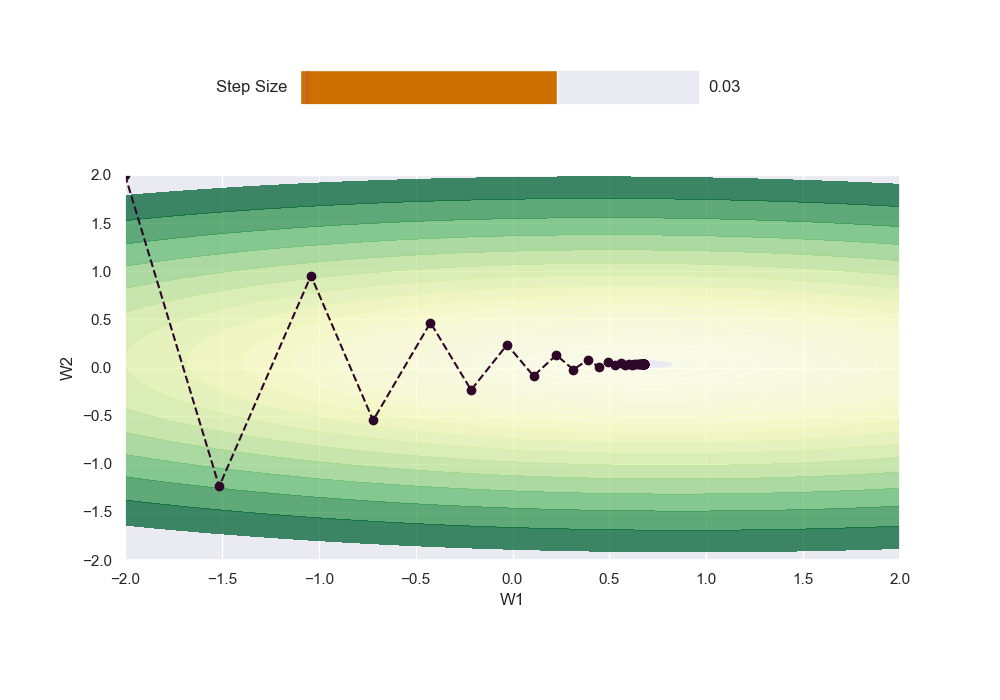

Text(0, 0.5, 'W2')

In [24]:
%matplotlib notebook
import seaborn as sns
sns.set()


A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

        
        

fig = plt.figure(figsize=(10, 7))


# Create main axis
ax = fig.add_subplot(111)
ax.contourf(A, B, levels, levels=np.logspace(0, 2, num=20), alpha=0.75,  cmap=plt.cm.YlGn)
fig.subplots_adjust(bottom=0.2, top=0.75)


ax_alpha = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_alpha.spines['top'].set_visible(True)
ax_alpha.spines['right'].set_visible(True)



# Create sliders
s_alpha = Slider(ax=ax_alpha, label='Step Size ', valmin=0.0001, valmax=0.05, valinit=0.001, facecolor='#cc7000')


alpha = 0.0001
x, y =  draw_GD_MS(alpha)
f_d, = ax.plot(x, y, '--o',linewidth=1.5, c="#2e0729",)


# Update values
def update(val):
    alpha = s_alpha.val
    x, y =  draw_GD_MS(alpha)
    f_d.set_data(x, y)
    fig.canvas.draw_idle()

s_alpha.on_changed(update) 

ax.set_xlabel('W1', )
ax.set_ylabel('W2')


# ЗАЧЕМ СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК?

Задача минимизации часто ставятся следующим образом

$$
\min f(x) = \min \frac{1}{n} \sum^{n}_{i} f(x_{i})
$$

Гду $n$ очень большое

Одна итерация градиентного спуска становиться очень дорогой так как


$$
x_{k+1} = x_k - \alpha f'(x_k) =  x_k - \alpha  \sum^{n}_{i}  f'(x_k)
$$



 Можно брать подвыборку по нескольким $m$ объектам $m<<n$
 
 
 $$
 h_k =  \frac{1}{m} \sum^{m}_{i} f_{i_k}'(x_{k})
 $$

Где каждый раз выбирается $i_k$ -  подможество из $m$ объектов

# Cвойства

 ##  Плюсы
 
$$
\mathbb{E}[h_k] =   f'(x_k)
$$

те двигаться мы в среднем будем двигаться в нужную сторону

##  Минусы



Большая дисперсия. Сходится не быстро

In [5]:
def StochGradDescent(alpha):

    alpha =alpha
    batch_size = 10
    w0= np.array([-2.,2])
    w = w0.copy()
    w_list = [w.copy()]
    stoch_grad_w = lambda X, Y, w: 2. * np.dot(X.T, (X.dot(w) - Y)) / Y.size


    for i in range(200):
        np.random.seed(i)
        ## YOUR CODE HERE 
        sample_indices = ...
        X_batch = ...
        Y_batch = ...
       
        stoch_grad = stoch_grad_w(X_batch, Y_batch, w)
        
        w = w -  alpha * stoch_grad
        w_list.append(w.copy())
    w_list = np.array(w_list)


    return  w_list[:, 0], w_list[:, 1]

def draw_SGD_MS(alpha):

    alpha =alpha

    x_na, y_na = StochGradDescent(alpha )

    return  x_na, y_na 

<IPython.core.display.Javascript object>


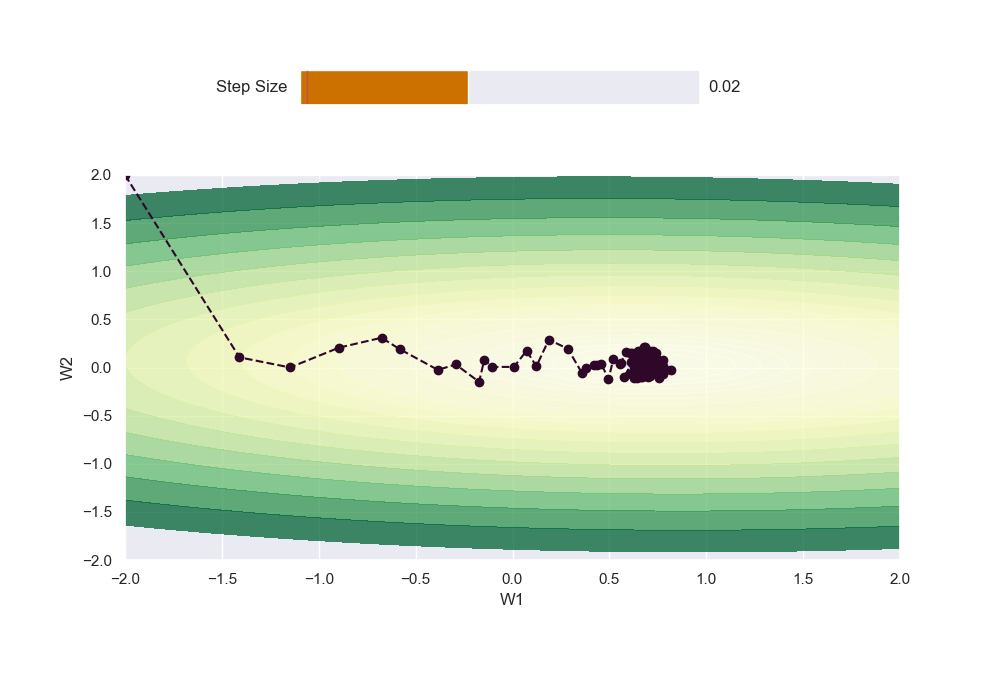

Text(0, 0.5, 'W2')

In [6]:
%matplotlib notebook
import seaborn as sns
sns.set()


A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

        
        

fig = plt.figure(figsize=(10, 7))


# Create main axis
ax = fig.add_subplot(111)
ax.contourf(A, B, levels, levels=np.logspace(0, 2, num=20), alpha=0.75,  cmap=plt.cm.YlGn)
fig.subplots_adjust(bottom=0.2, top=0.75)


ax_alpha = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_alpha.spines['top'].set_visible(True)
ax_alpha.spines['right'].set_visible(True)



# Create sliders
s_alpha = Slider(ax=ax_alpha, label='Step Size ', valmin=0.0001, valmax=0.05, valinit=0.001, facecolor='#cc7000')


alpha = 0.0001
x, y =  StochGradDescent(alpha)
f_d, = ax.plot(x, y, '--o',linewidth=1.5, c="#2e0729",)


# Update values
def update(val):
    alpha = s_alpha.val
    x, y =  StochGradDescent(alpha)
    f_d.set_data(x, y)
    fig.canvas.draw_idle()

s_alpha.on_changed(update) 

ax.set_xlabel('W1', )
ax.set_ylabel('W2')


In [8]:
def StochGradDescentBS(alpha, batch_size):

    alpha =alpha
    batch_size = batch_size
    w0= np.array([-2.,2])
    w = w0.copy()
    w_list = [w.copy()]
    stoch_grad_w = lambda X, Y, w: 2. * np.dot(X.T, (X.dot(w) - Y)) / Y.size


    for i in range(50):
        np.random.seed(i)
        sample_indices = np.random.randint(0, n_objects, batch_size) 
        X_batch = X[sample_indices, :]
        Y_batch = Y[sample_indices]
       
        stoch_grad = stoch_grad_w(X_batch, Y_batch, w)
        
        w = w -  alpha * stoch_grad
        w_list.append(w.copy())
    w_list = np.array(w_list)


    return  w_list[:, 0], w_list[:, 1]

def draw_SGD_MS_BS(alpha, batch_size):

    alpha =alpha
    batch_size = batch_size

    x_na, y_na = StochGradDescentBS(alpha, batch_size)

    return  x_na, y_na 

<IPython.core.display.Javascript object>


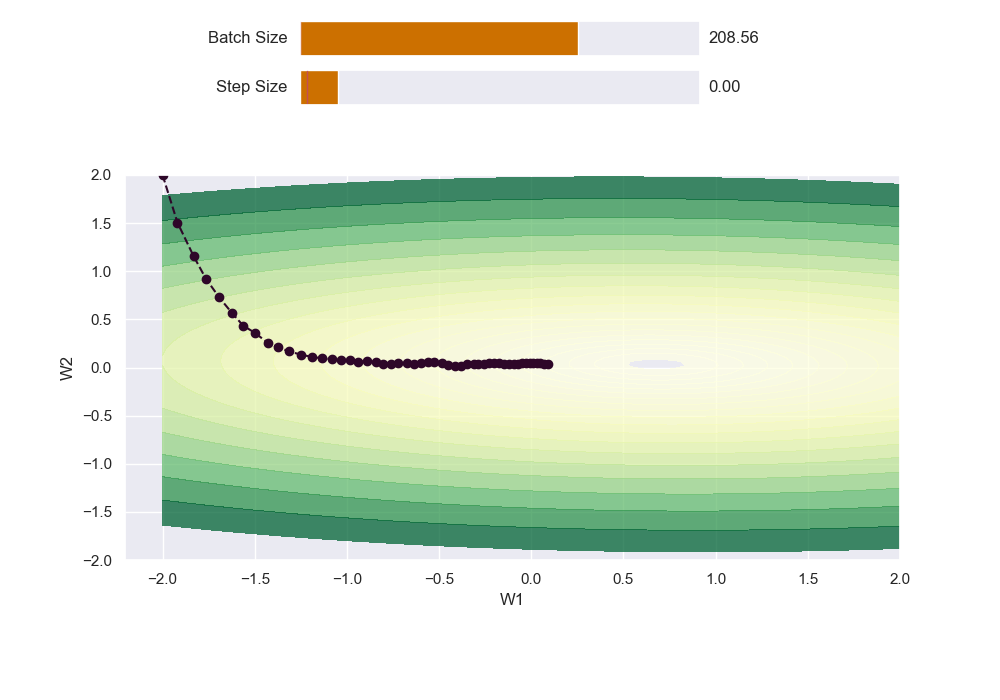

Text(0, 0.5, 'W2')

In [9]:
%matplotlib notebook
import seaborn as sns
sns.set()


A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

        
        

fig = plt.figure(figsize=(10, 7))


# Create main axis
ax = fig.add_subplot(111)
ax.contourf(A, B, levels, levels=np.logspace(0, 2, num=20), alpha=0.75,  cmap=plt.cm.YlGn)
fig.subplots_adjust(bottom=0.2, top=0.75)


ax_alpha = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_alpha.spines['top'].set_visible(True)
ax_alpha.spines['right'].set_visible(True)

ax_bs = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_bs.spines['top'].set_visible(True)
ax_bs.spines['right'].set_visible(True)

# Create sliders




# Create sliders
s_alpha = Slider(ax=ax_alpha, label='Step Size ', valmin=0.0001, valmax=0.05, valinit=0.001, facecolor='#cc7000')
s_bs = Slider(ax=ax_bs, label='Batch Size ', valmin=1, valmax=300, valinit=1, facecolor='#cc7000')
              
alpha = 0.0001
batch_size = 1
x, y =  StochGradDescentBS(alpha, batch_size)
f_d, = ax.plot(x, y, '--o',linewidth=1.5, c="#2e0729",)


# Update values
def update(val):
    alpha = s_alpha.val
    batch_size = s_bs.val
    x, y =  StochGradDescentBS(alpha, int(batch_size))
    f_d.set_data(x, y)
    fig.canvas.draw_idle()

s_alpha.on_changed(update) 
s_bs.on_changed(update) 

ax.set_xlabel('W1', )
ax.set_ylabel('W2')


# ЗАДАЧА МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ

Сегодня мы научим компьютер видеть

![](MNISTCNN.png)

([Картинка отсюда](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-3/v-3/97))

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

немного про торч

In [15]:
a = torch.rand(5)
b = torch.rand(5)

In [16]:
a, b

(tensor([0.7343, 0.0563, 0.4755, 0.2483, 0.8309]),
 tensor([0.0080, 0.9141, 0.6211, 0.0294, 0.2197]))

In [17]:
torch.add(a,b), torch.mul(a,b), torch.div(a,b)

(tensor([0.7423, 0.9704, 1.0967, 0.2778, 1.0507]),
 tensor([0.0059, 0.0514, 0.2954, 0.0073, 0.1826]),
 tensor([9.1884e+01, 6.1571e-02, 7.6563e-01, 8.4450e+00, 3.7813e+00]))

In [18]:
a, b

(tensor([0.7343, 0.0563, 0.4755, 0.2483, 0.8309]),
 tensor([0.0080, 0.9141, 0.6211, 0.0294, 0.2197]))

In [19]:
a.add_(b)

tensor([0.7423, 0.9704, 1.0967, 0.2778, 1.0507])

In [21]:
a, b

(tensor([0.7423, 0.9704, 1.0967, 0.2778, 1.0507]),
 tensor([0.0080, 0.9141, 0.6211, 0.0294, 0.2197]))

In [22]:
a.div_(b), a, b

(tensor([92.8844,  1.0616,  1.7656,  9.4450,  4.7813]),
 tensor([92.8844,  1.0616,  1.7656,  9.4450,  4.7813]),
 tensor([0.0080, 0.9141, 0.6211, 0.0294, 0.2197]))

In [23]:
a.mul_(b), a, b

(tensor([0.7423, 0.9704, 1.0967, 0.2778, 1.0507]),
 tensor([0.7423, 0.9704, 1.0967, 0.2778, 1.0507]),
 tensor([0.0080, 0.9141, 0.6211, 0.0294, 0.2197]))

In [2]:
from torchvision import datasets, transforms

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                                           transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           ])),
                            batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, transform=transforms.Compose([
                                       transforms.ToTensor(),
                            ])),
                batch_size=16, shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.maxPool1 = nn.MaxPool2d(kernel_size=2)
        self.Relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.maxPool2 = nn.MaxPool2d(kernel_size=2)
        self.conv2_drop = nn.Dropout()
        self.Relu2 = nn.ReLU()
        
        self.fc1 = nn.Linear(320, 50)
        self.Relu3 = nn.ReLU()
        
        self.relu3_drop =  nn.Dropout()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxPool1(x)
        x = self.Relu1(x)

        x = self.conv2(x)
        x = self.maxPool2(x)
        x = self.conv2_drop(x)
        x = self.Relu2(x)

        x = x.view(-1, 320)
        x = self.fc1(x)
        x = self.Relu3(x)
        z = self.relu3_drop(x)

        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


def train(model, train_loader, optimizer, epoch, log_interval):
    model.train()
    current_conv = []
    for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        current_conv.append(loss)
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return current_conv

def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduce=True).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Напишем несколько различных оптимизаторов, чтобы обучить нашу модельку


## SGD TORCH VERSION 

![](SGD_TORCH.png)

#  НО У ТОРЧА НЕБОЛЬШИЕ ПРИКОЛЫ

![](sgd_prikols.png)

## SGD  что имплеминтируем


![](SGD2.png)

In [ ]:
import torch

import numpy as np
import torch
from torch.optim import Optimizer


class CustomSGD(Optimizer):

            # \begin{aligned}
            #     v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
            #     p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
            # \end{aligned}
      


    def __init__(self, params, lr= 1e-3, momentum=0, 
                 nesterov=False):
        if ((lr is None) or (lr < 0.0)):
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
      

        defaults = dict(lr=lr, momentum=momentum, nesterov=nesterov)
        if nesterov and (momentum <= 0 ):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(CustomSGD, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(CustomSGD, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            params_with_grad = []
            d_p_list = []
            momentum_buffer_list = []
            
            momentum = group['momentum']
            
            nesterov = group['nesterov']
            lr = group['lr']

            for p in group['params']:
                if p.grad is not None:
                    params_with_grad.append(p)
                    d_p_list.append(p.grad)

                    state = self.state[p]
                    if 'momentum_buffer' not in state:
                        momentum_buffer_list.append(None)
                    else:
                        momentum_buffer_list.append(state['momentum_buffer'])

            for i, (param, grad)  in enumerate(zip(params_with_grad, d_p_list)) :
                
                #. DO
                


                ## END DO
        
            for p, momentum_buffer in zip(params_with_grad, momentum_buffer_list):
                state = self.state[p]
                state['momentum_buffer'] = momentum_buffer

        return loss

## ADAGRAD (adaptive gradient) TORCH VERSION

![](ADAGRAD_TORCH.png)

## ADAGRAD (adaptive gradient) CLASSIC VERSION

![](ADAGRAD2.png)


In [ ]:
import torch

import numpy as np
import torch
from torch.optim import Optimizer


class CustomAdagrad(Optimizer):
   
    def __init__(self, params, lr=1e-2,  eps=1e-10, initial_accumulator_value=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= initial_accumulator_value:
            raise ValueError("Invalid initial_accumulator_value value: {}".format(initial_accumulator_value))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))

        defaults = dict(lr=lr,  eps=eps)
        super(CustomAdagrad, self).__init__(params, defaults)

        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                state['step'] = 0
                # init_value = complex(initial_accumulator_value, initial_accumulator_value) if torch.is_complex(p) \
                init_value =   initial_accumulator_value
                state['sum'] = torch.full_like(p,  init_value, memory_format=torch.preserve_format)

    def share_memory(self):
        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                state['sum'].share_memory_()

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            params_with_grad = []
            grads = []
            state_sums = []
            state_steps = []

            for p in group['params']:
                if p.grad is not None:
                    params_with_grad.append(p)
                    grads.append(p.grad)
                    state = self.state[p]
                    state_sums.append(state['sum'])
                    state['step'] += 1
                    state_steps.append(state['step'])


            for (param, grad, state_sum, step) in zip(params_with_grad, grads, state_sums, state_steps):


                
                eps = group['eps']
               
                ## DO
             
          
                
                ## ENDDO

        return loss

## RMSPROP TORCH Version

![](RMSPROP.png)

## RMSPROP Classic Version

![](RMSPROP2.png)

([Лекция, на которой метод был предложен](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf))

In [ ]:
import torch

import numpy as np
import torch
from torch.optim import Optimizer


class CustomRMSprop(Optimizer):


    def __init__(self, params, lr=1e-2, alpha=0.99, eps=1e-8, momentum=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= momentum:
            raise ValueError("Invalid momentum value: {}".format(momentum))

        if not 0.0 <= alpha:
            raise ValueError("Invalid alpha value: {}".format(alpha))

        defaults = dict(lr=lr, momentum=momentum, alpha=alpha, eps=eps, )
        super(CustomRMSprop, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RMSprop, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('momentum', 0)
           

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            params_with_grad = []
            grads = []
            square_avgs = []
            grad_avgs = []
            momentum_buffer_list = []

            for p in group['params']:
                if p.grad is None:
                    continue
                params_with_grad.append(p)

    
                grads.append(p.grad)

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['square_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    if group['momentum'] > 0:
                        state['momentum_buffer'] = torch.zeros_like(p, memory_format=torch.preserve_format)
       

                square_avgs.append(state['square_avg'])

                if group['momentum'] > 0:
                    momentum_buffer_list.append(state['momentum_buffer'])
                

                state['step'] += 1



            for i,(grad, param, state_sum) in enumerate(zip( grads, params_with_grad, square_avgs)):
              
                alpha=group['alpha']
                eps=group['eps']
                momentum=group['momentum']

                ## DO

                    
                ## END DO
                 

        return loss 

## ADAM

![](ADAM.png)

## ADAM TORCH VERSION

![](ADAM_TORCH.png)

## ADAM CLASSIC

![](ADAM2.png)

In [ ]:
import torch

import numpy as np
import torch
from torch.optim import Optimizer

class CustomAdam(Optimizer):
    
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        defaults = dict(lr=lr, betas=betas, eps=eps)
        super(CustomAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(CustomAdam, self).__setstate__(state)


    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Args:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            params_with_grad = []
            grads = []
            exp_avgs = []
            exp_avg_sqs = []
            max_exp_avg_sqs = []
            state_steps = []
            beta1, beta2 = group['betas']

            for p in group['params']:
                if p.grad is not None:
                    params_with_grad.append(p)
                    if p.grad.is_sparse:
                        raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')
                    grads.append(p.grad)

                    state = self.state[p]
                    # Lazy state initialization
                    if len(state) == 0:
                        state['step'] = 0
                        # Exponential moving average of gradient values
                        state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                        # Exponential moving average of squared gradient values
                        state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)


                    exp_avgs.append(state['exp_avg'])
                    exp_avg_sqs.append(state['exp_avg_sq'])

                    state['step'] += 1
                    # record the step after step update
                    state_steps.append(state['step'])

         
            for i, (param, grad, m, v, step )in enumerate(zip(params_with_grad, grads, exp_avgs, exp_avg_sqs, state_steps )):

                lr=group['lr']
                eps=group['eps']

                ##DO
               

                ## END DO
        return loss

In [ ]:
models = {
    "SGD": Net(),
    "SGD momentum": Net(),
    "RMSprop" : Net(),
    "Adam": Net(),
    "Adagrad": Net()
}

# optimizers = {
#     "SGD": optim.SGD(models["SGD"].parameters(), lr=lr),
#     "SGD momentum": optim.SGD(models["SGD momentum"].parameters(), lr=lr, momentum=momentum),
#     "Adam": optim.Adam(models["Adam"].parameters(), lr=lr),
#     "Adagrad": optim.Adagrad(models["Adagrad"].parameters(), lr=lr)
# }
optimizers = {
    "SGD": CustomSGD(models["SGD"].parameters(), lr=lr),
    "SGD momentum": CustomSGD(models["SGD momentum"].parameters(), lr=lr, momentum=momentum),
    "RMSprop" :  CustomRMSprop(models["RMSprop"].parameters(), lr=lr),
    "Adam": CustomAdam(models["Adam"].parameters(), lr=lr),
    "Adagrad": CustomAdagrad(models["Adagrad"].parameters(), lr=lr)
}


In [ ]:
conv = {opt_name: [] for opt_name in optimizers}
for opt in optimizers:
    print(opt)
    for epoch in range(1, epochs + 1):
        cur_conv = train(models[opt], train_loader, optimizers[opt], epoch, log_interval)
        conv[opt] = conv[opt] + cur_conv

        test(models[opt], test_loader)

In [ ]:
for opt_name in conv:
    plt.plot(conv[opt_name], label=opt_name)
plt.legend()